<a href="https://colab.research.google.com/github/Disnu26/myprojects/blob/main/EEG_waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne


In [ ]:
pip install mne[hdf5]

In [ ]:
pip install h5io pymatreader

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import mne
import matplotlib.pyplot as plt


In [ ]:
fname="/oddball_example_small-fif.gz"

In [ ]:
raw=mne.io.read_raw_fif(fname)

Opening raw data file /oddball_example_small-fif.gz...


<ipython-input-7-964280ca44b7>:1: RuntimeWarning: This filename (/oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=mne.io.read_raw_fif(fname)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.


In [ ]:
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_raw_file',
 '_read_

In [ ]:
raw=mne.io.read_raw_fif(fname,preload=True)

Opening raw data file /oddball_example_small-fif.gz...


<ipython-input-9-0a4fb1c6ce1d>:1: RuntimeWarning: This filename (/oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=mne.io.read_raw_fif(fname,preload=True)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


In [ ]:
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

Using matplotlib as 2D backend.


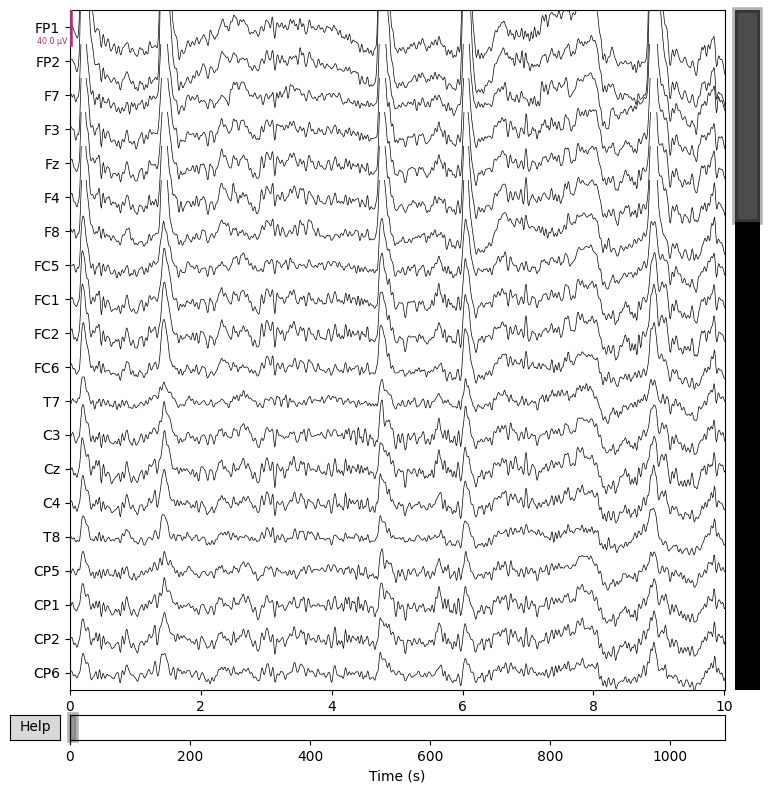

In [ ]:
raw.plot();#eyemoment artifacts

In [ ]:
#preprocessing the data using ICA (independent component analysis)
ica=mne.preprocessing.ICA(n_components=20,random_state=0)

In [ ]:
ica=mne.preprocessing.ICA(n_components=20,random_state=0)
ica.fit(raw.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 23.1s.


Method,fastica
Fit,72 iterations on raw data (109098 samples)
ICA components,20
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
ica.exclude = [1,10,14,17,18,19]

In [ ]:
bad_idx,scores=ica.find_bads_eog(raw,'SO2',threshold=2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


[14, 10]


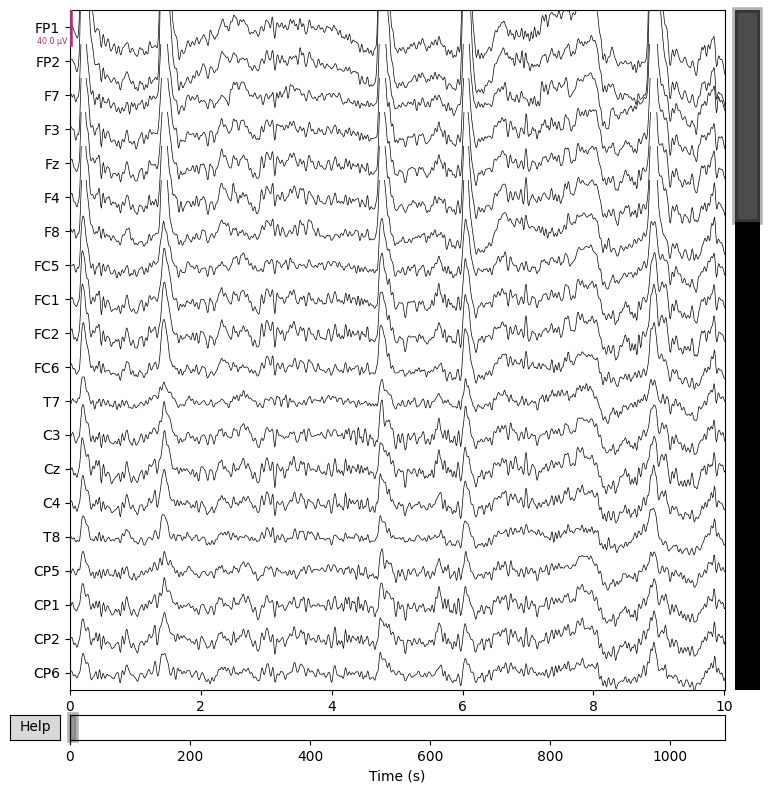

In [ ]:
raw.plot();

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


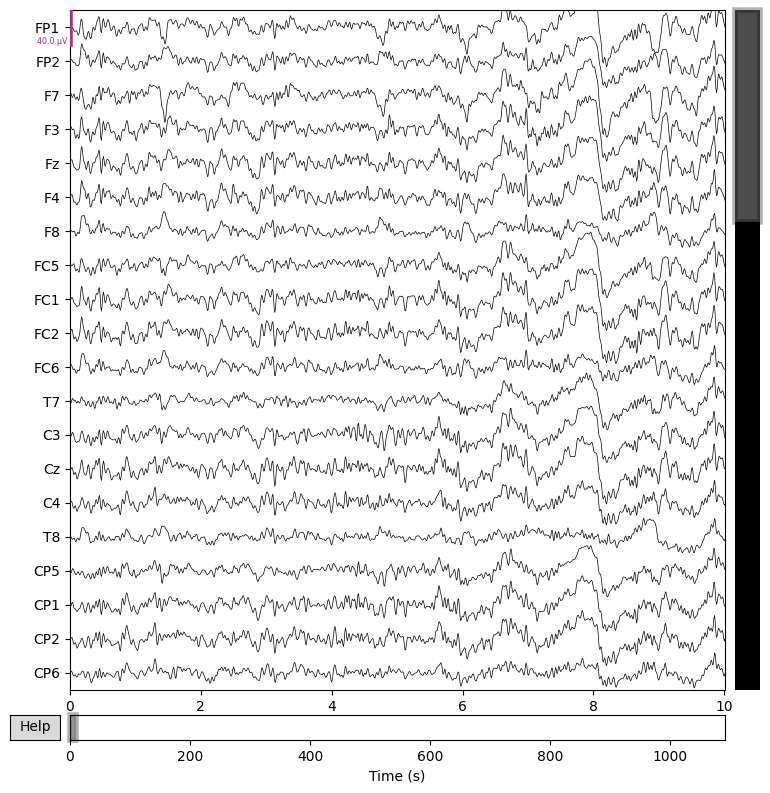

In [ ]:
ica.apply(raw.copy(),exclude=ica.exclude).plot();#sharp points would be gone

In [ ]:
events=mne.find_events(raw)


903 events found
Event IDs: [100 200]


In [ ]:
events

array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]])

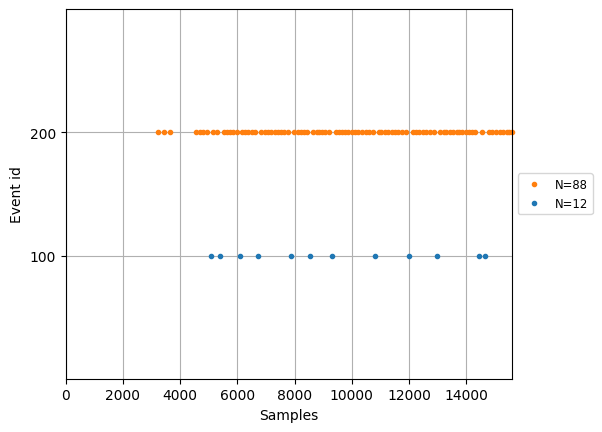

In [ ]:
mne.viz.plot_events(events[:100]);

In [ ]:
event_ids={"standard/stimulus":200,"target/stimulus":100}
epochs=mne.Epochs(raw,events,event_id=event_ids)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped


<ipython-input-24-f3e5ec774c80>:1: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs.plot();


Using data from preloaded Raw for 20 events and 71 original time points ...


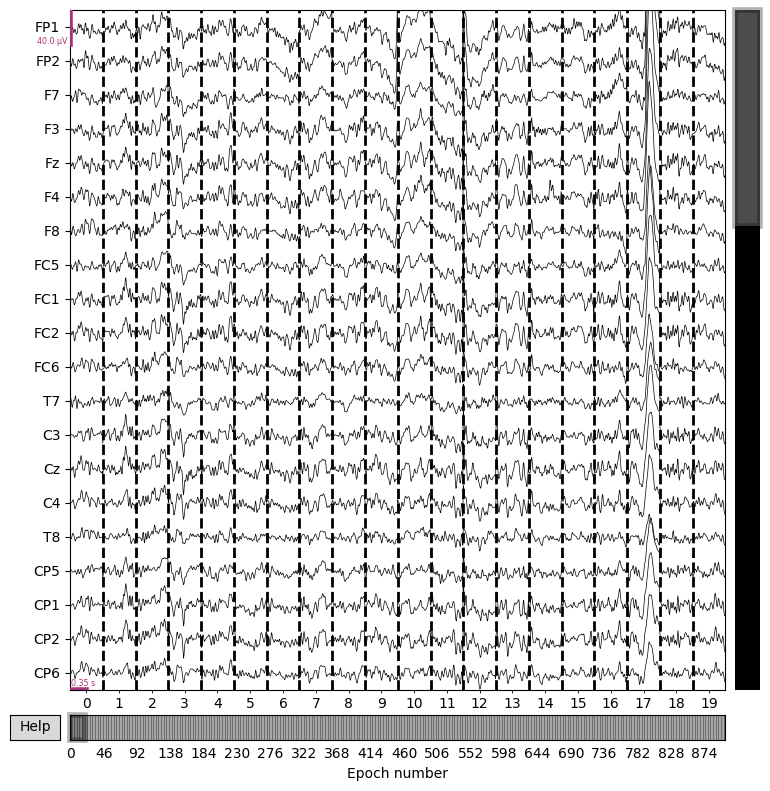

In [ ]:
epochs.plot();

In [ ]:
epochs=mne.Epochs(raw,events,event_id=event_ids,preload=True)
epochs=ica.apply(epochs, exclude=ica.exclude)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


<ipython-input-30-26d206fc3cce>:2: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs=ica.apply(epochs, exclude=ica.exclude)


In [ ]:
epochs.apply_baseline((None,0))

Applying baseline correction (mode: mean)


Number of events,903
Events,standard/stimulus: 797target/stimulus: 106
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


In [ ]:
epochs["target"]

Number of events,106
Events,target/stimulus: 106
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


In [ ]:
epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


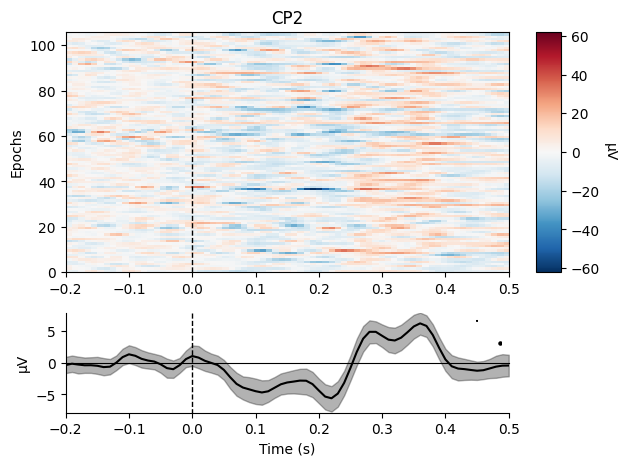

In [ ]:
epochs["target"].plot_image(picks=[18]);

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


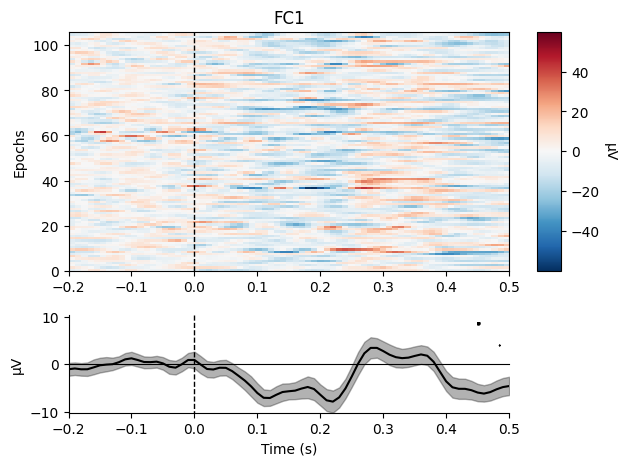

In [ ]:
epochs["target"].plot_image(picks=[8]);

In [ ]:
epochs.equalize_event_counts(event_ids)
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

Number of events,212
Events,standard/stimulus: 106target/stimulus: 106
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s
